# Tarea Práctica 2

Integrantes: 
- Daniel Carmona
- Matías Jara
- Juan Pablo Cabeza

## P1. Handwritten Digits Classification

#### 1. Cree una función que permita visualizar un dato y la clase correspondiente

0


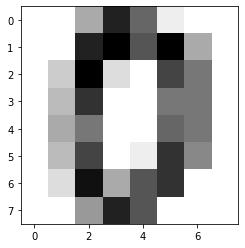

In [ ]:
from sklearn.datasets import load_digits
import matplotlib.pyplot as plt

X,y = load_digits(return_X_y = True)
plt.imshow(X[0].reshape(8 ,8), cmap = plt.cm.gray_r, interpolation='nearest')
print(y[0])

In [ ]:
def visualizarDato(index):
  plt.imshow(X[index].reshape(8 ,8), cmap = plt.cm.gray_r, interpolation='nearest')
  plt.title('Dato N°'+str(index)+" - Clase: "+str(y[index]))

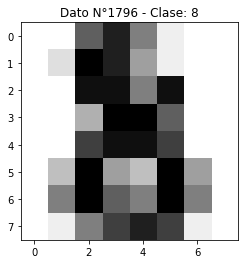

In [ ]:
visualizarDato(1796)

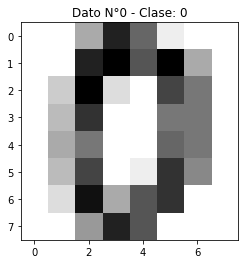

In [ ]:
visualizarDato(0)

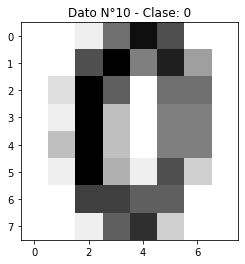

In [ ]:
visualizarDato(10 )

In [ ]:
print("Largo de clases y: ",len(y))
print("Dimensiones de X: ",(len(X),(len(X[0]))))
print(y[1796])
print(X[0])



Largo de clases y:  1797
Dimensiones de X:  (1797, 64)
8
[ 0.  0.  5. 13.  9.  1.  0.  0.  0.  0. 13. 15. 10. 15.  5.  0.  0.  3.
 15.  2.  0. 11.  8.  0.  0.  4. 12.  0.  0.  8.  8.  0.  0.  5.  8.  0.
  0.  9.  8.  0.  0.  4. 11.  0.  1. 12.  7.  0.  0.  2. 14.  5. 10. 12.
  0.  0.  0.  0.  6. 13. 10.  0.  0.  0.]


In [ ]:
#X,y = load_digits(return_X_y = True, as_frame= True)
data=load_digits()
X = data['data']
y = data['target']

In [ ]:
X[0]

array([ 0.,  0.,  5., 13.,  9.,  1.,  0.,  0.,  0.,  0., 13., 15., 10.,
       15.,  5.,  0.,  0.,  3., 15.,  2.,  0., 11.,  8.,  0.,  0.,  4.,
       12.,  0.,  0.,  8.,  8.,  0.,  0.,  5.,  8.,  0.,  0.,  9.,  8.,
        0.,  0.,  4., 11.,  0.,  1., 12.,  7.,  0.,  0.,  2., 14.,  5.,
       10., 12.,  0.,  0.,  0.,  0.,  6., 13., 10.,  0.,  0.,  0.])

In [ ]:
from sklearn.model_selection import train_test_split
xtrain, xtest, ytrain, ytest = train_test_split(X, y, test_size = 0.2, random_state = 100)



#### 2. Cree una clase Perceptron() que implemente el algoritmo del Perceptrón y que discrimine un dígito de todo el resto. Su clase debe recibir al menos los siguientes parámetros:

#### 1. Cree una función que implemente este sistema, puede agregar los métodos que requiera en la clase Perceptron()

In [ ]:
import numpy as np

class Perceptron(object): # aun no esta listo           
  
  def __init__(self, dig, max_iter=100, random_state=1, learning_rate=0.01, tol=100):
    self.dig = dig    # digito a clasificar
    self.max_iter = max_iter  # max de iteraciones
    self.random_state = random_state
    self.lr = learning_rate   # learning rate gradiente estocastico
    self.tol = tol            # criterio detencion algoritmo
    self.w = []

  def fit(self, X, y):
    rgen = np.random.RandomState(self.random_state)
    self.coef_ = rgen.normal(loc=0.0, scale=0.01, size=1 + X.shape[1])
    for _ in range(self.max_iter):
      for xi, expected_value in zip(X, y):
        predicted_value = self.predicto(xi)
        self.coef_[1:] = self.coef_[1:] + self.lr * (expected_value - predicted_value) * xi
        self.coef_[0] = self.coef_[0] + self.lr * (expected_value - predicted_value) * 1

  def net_input(self, X):
    weighted_sum = np.dot(X, self.coef_[1:]) + self.coef_[0]
    #self.w.append(weighted_sum)
    return weighted_sum

  def activation_function(self, X):
    weighted_sum = self.net_input(X)
    self.w.append(weighted_sum)
    return np.where(weighted_sum >= 0.0, 1, 0)
    #return self.w

  def predicto(self, X):
    #self.w = []
    return self.activation_function(X) 

  def predict(self, X):
    self.w = []
    y = []
    for xi in X:
      y.append(self.predicto(xi))
    ypred = np.array(y)
    return ypred

  def weights(self):
    return self.w

  def score(self, X, y):
    misclassified_data_count = 0
    for xi, target in zip(X, y):
      output = self.predicto(xi)
      if(target != output):
        misclassified_data_count += 1
    total_data_count = len(X)
    self.score_ = (total_data_count - misclassified_data_count)/total_data_count
    return self.score_

In [ ]:
def plot(ypred,ytest):
    accuracy = accuracy_score(ytest, ypred, normalize=True)
    cm = confusion_matrix(ytest, ypred,normalize='true')

    print(f'Accuracy: {accuracy}')
    plt.figure(figsize = (10,7))
    sn.heatmap(cm, annot=True)
    plt.xlabel("Predicción")
    plt.ylabel("Observación")
    plt.title('Matriz de Confusión Clasificador')

In [ ]:
def replaceNum(y, num):
    arreglo = []
    for i in range(len(y)):
      if y[i] == num:
        arreglo.append(1)
            #y[i] = 1
      else:
        arreglo.append(-1)
            #y[i] = -1
    x = np.array(arreglo)
    return x

In [ ]:
def algoPer(xtrain,ytrain, xtest):
    ytrain0 = replaceNum(ytrain,0)
    ytrain1 = replaceNum(ytrain,1)
    ytrain2 = replaceNum(ytrain,2)
    ytrain3 = replaceNum(ytrain,3)
    ytrain4 = replaceNum(ytrain,4)
    ytrain5 = replaceNum(ytrain,5)
    ytrain6 = replaceNum(ytrain,6)
    ytrain7 = replaceNum(ytrain,7)
    ytrain8 = replaceNum(ytrain,8)
    ytrain9 = replaceNum(ytrain,9)

    p0 = Perceptron(0)
    p1 = Perceptron(1)#.fit(xtrain,ytrain)
    p2 = Perceptron(2)#.fit(xtrain,ytrain)
    p3 = Perceptron(3)#.fit(xtrain,ytrain)
    p4 = Perceptron(4)#.fit(xtrain,ytrain)
    p5 = Perceptron(5)#.fit(xtrain,ytrain)
    p6 = Perceptron(6)#.fit(xtrain,ytrain)
    p7 = Perceptron(7)#.fit(xtrain,ytrain)
    p8 = Perceptron(8)#.fit(xtrain,ytrain)
    p9 = Perceptron(9)#.fit(xtrain,ytrain)

    p0.fit(xtrain,ytrain0)
    p1.fit(xtrain,ytrain1)
    p2.fit(xtrain,ytrain2)
    p3.fit(xtrain,ytrain3)
    p4.fit(xtrain,ytrain4)
    p5.fit(xtrain,ytrain5)
    p6.fit(xtrain,ytrain6)
    p7.fit(xtrain,ytrain7)
    p8.fit(xtrain,ytrain8)
    p9.fit(xtrain,ytrain9)

    y0 = p0.predict(xtest)
    w0 = p0.weights()

    y1 = p1.predict(xtest)
    w1 = p1.weights()

    y2 = p2.predict(xtest)
    w2 = p2.weights()

    y3 = p3.predict(xtest)
    w3 = p3.weights()

    y4 = p4.predict(xtest)
    w4 = p4.weights()

    y5 = p5.predict(xtest)
    w5 = p5.weights()

    y6 = p6.predict(xtest)
    w6 = p6.weights()

    y7 = p7.predict(xtest)
    w7 = p7.weights()

    y8 = p8.predict(xtest)
    w8 = p8.weights()

    y9 = p9.predict(xtest)
    w9 = p9.weights()
    
    ypred = []
    for i in range(len(xtest)):
        y_class = np.array([w0[i],w1[i],w2[i],w3[i],w4[i],w5[i],w6[i],w7[i],w8[i],w9[i]])
        #ypred[i] = np.argmax(y_class)
        ypred.append(np.argmax(y_class))

    return ypred

In [ ]:
ypred = algoPer(xtrain,ytrain,xtest)

Accuracy: 0.7638888888888888


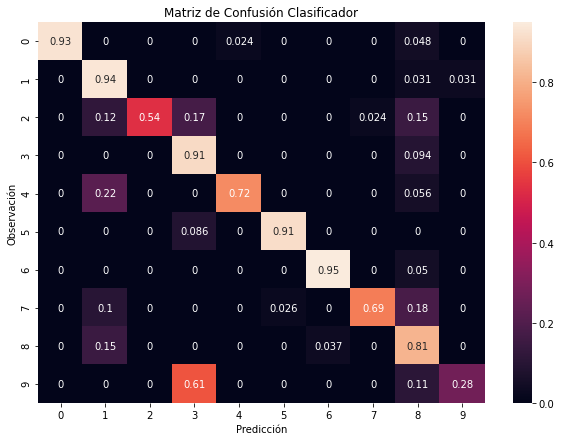

In [ ]:
plot(ypred,ytest)

#### 4. Compare los resultados con lo obtenido al aplicar un algoritmo de Support Vector Machines. Para esto, estudie el algoritmo de Support Vector Classifier (SVC) implementado en sklearn.svm, elija un kernel que se ajuste mejor a los datos según el criterio que usted le parezca mejor, argumente su elección. Implemente el algoritmo utilizando el enfoque One vs All. Comente los resultados obtenidos y compare con el algoritmo implementado en la pregunta, discuta sobre los distintos enfoques que tiene y por qué un algoritmo tiene mejor rendimiento que otro.

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC

def run_grid_search(model, params, x_train, y_train):
    grid = GridSearchCV(model, params, 
                       cv=5, 
                       )
    grid.fit(x_train,y_train)
    return grid.best_params_

In [ ]:
params = {'C':[0.1, 1, 10, 100],
          'kernel':['linear','rbf']}
svcModel = SVC(probability=False)

bestParams = run_grid_search(svcModel, params,xtrain,ytrain)
print(bestParams)

{'C': 10, 'kernel': 'rbf'}


In [ ]:
SVC_Model = SVC(kernel=bestParams['kernel'], C=bestParams['C'], probability=False).fit(xtrain,ytrain)

Accuracy SVC: 1.0
[-0.62373824 -0.45077666 -0.3467671  -0.5632533  -0.76030823 -0.27250109
 -0.49213567 -0.40931776 -0.33898901  0.57132443  0.44542321  0.19960578
  0.2800452   0.25525569  0.13043532  0.88356483  0.50843527  0.06142157
 -0.05200834 -0.06137927  0.16578444 -0.01621204  0.11483554  0.04658243
 -0.24984914 -0.2326558   0.06076239 -0.21564123  0.00391224  0.07493711
  0.23578688  0.38360554  0.0221775   0.18426806 -0.0246307   0.22672443
 -0.0386525   0.37606324 -0.06785096 -0.17693628 -0.16905571 -0.15899891
  0.50101678  0.08965996 -0.42913181]


Text(0.5, 1.0, 'Matriz de Confusión Clasificador SVC - RBF')

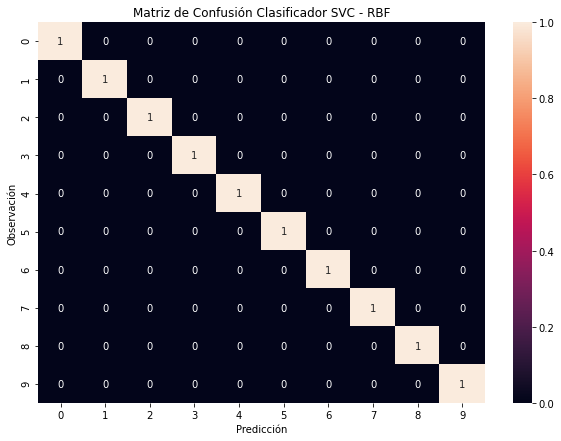

In [ ]:
from sklearn.metrics import confusion_matrix, accuracy_score
import seaborn as sn

y_pred = SVC_Model.predict(xtest)
accuracy = accuracy_score(ytest, y_pred, normalize=True)
cm_SVC = confusion_matrix(ytest, y_pred,normalize='true')

print(f'Accuracy SVC: {accuracy}')
print(SVC_Model.intercept_)

plt.figure(figsize = (10,7))
sn.heatmap(cm_SVC, annot=True)
plt.xlabel("Predicción")
plt.ylabel("Observación")
plt.title('Matriz de Confusión Clasificador SVC - RBF')

Accuracy SVC: 0.9861111111111112
[-0.62373824 -0.45077666 -0.3467671  -0.5632533  -0.76030823 -0.27250109
 -0.49213567 -0.40931776 -0.33898901  0.57132443  0.44542321  0.19960578
  0.2800452   0.25525569  0.13043532  0.88356483  0.50843527  0.06142157
 -0.05200834 -0.06137927  0.16578444 -0.01621204  0.11483554  0.04658243
 -0.24984914 -0.2326558   0.06076239 -0.21564123  0.00391224  0.07493711
  0.23578688  0.38360554  0.0221775   0.18426806 -0.0246307   0.22672443
 -0.0386525   0.37606324 -0.06785096 -0.17693628 -0.16905571 -0.15899891
  0.50101678  0.08965996 -0.42913181]


Text(0.5, 1.0, 'Matriz de Confusión Clasificador SVC - Lineal')

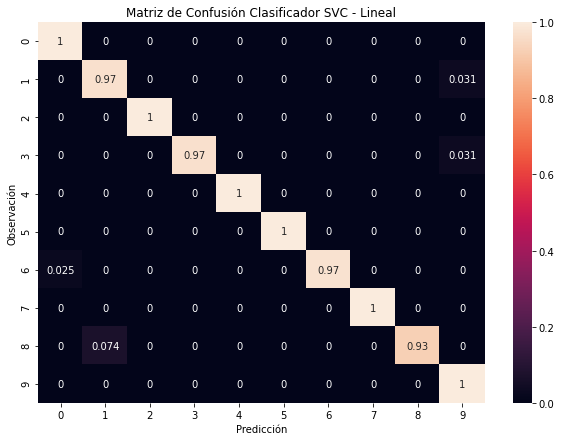

In [ ]:
SVC_Model2 = SVC(kernel='linear', C=bestParams['C'], probability=False).fit(xtrain,ytrain)
y_pred2 = SVC_Model2.predict(xtest)
accuracy2 = accuracy_score(ytest, y_pred2, normalize=True)
cm_SVC2 = confusion_matrix(ytest, y_pred2,normalize='true')

print(f'Accuracy SVC: {accuracy2}')
print(SVC_Model.intercept_)

plt.figure(figsize = (10,7))
sn.heatmap(cm_SVC2, annot=True)
plt.xlabel("Predicción")
plt.ylabel("Observación")
plt.title('Matriz de Confusión Clasificador SVC - Lineal')

## P2. Breast Cancer Prediction

El objetivo de este problema es estudiar el comportamiento de los SVC en distintas situaciones. 
Para esto, se considera en esta pregunta a la base de datos de Breast Cancer que pueden importar con la función 
load_breast_cancer de la librería sklearn.datasets.

#### 1. Describa el dataset. Reporte la cantidad de columnas, datos y la cantidad de tumores malignos y benignos. Sea breve.

In [ ]:
import numpy as np
import pandas as pd
from sklearn.datasets import load_breast_cancer

data_cancer = load_breast_cancer()
print(data_cancer.target_names)

df =  pd.DataFrame(data_cancer.data, columns=[data_cancer.feature_names])
df['target'] = data_cancer.target

df.head()

['malignant' 'benign']


,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,radius error,texture error,perimeter error,area error,smoothness error,compactness error,concavity error,concave points error,symmetry error,fractal dimension error,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0


In [ ]:
data_cancer = load_breast_cancer()
cancer_df = pd.DataFrame(data_cancer.data, columns = data_cancer.feature_names)
cancer_df['target_names'] = data_cancer.target
cancer_df.replace({'target_names': {0: 'Malignant', 1: 'Benign'}}, inplace = True)

print('Cantidad de datos: ', cancer_df.shape, cancer_df.size)
print('Cantidad de columnas: ', cancer_df.columns.size)
print('Clasificación de tumores: \n', cancer_df['target_names'].value_counts())

Cantidad de datos:  (569, 31) 17639
Cantidad de columnas:  31
Clasificación de tumores: 
 Benign       357
Malignant    212
Name: target_names, dtype: int64


#### 2. Aplique los algoritmos Logit, SVC y LDA.

In [ ]:
from sklearn.model_selection import train_test_split
x_df = df.drop(['target'], axis=1)
y_df = df.iloc[:,30]
X_train, X_test, y_train, y_test = train_test_split(x_df, y_df, test_size = 0.2, random_state = 42)

/usr/local/lib/python3.7/dist-packages/pandas/core/generic.py:3889: PerformanceWarning: dropping on a non-lexsorted multi-index without a level parameter may impact performance.
  obj = obj._drop_axis(labels, axis, level=level, errors=errors)


Accuracy SVC: 0.956140350877193
Coeficientes SVC: [[ 1.25502402e+00  9.29618466e-02 -1.44014500e-01 -6.97851684e-04
  -2.56387359e-01 -2.80596000e-01 -6.75055421e-01 -3.99157770e-01
  -3.42945399e-01 -4.16351548e-02 -9.79387281e-02  1.60499593e+00
  -1.31052801e-02 -6.79864526e-02 -5.03740209e-02  6.08359630e-02
  -7.39855780e-02 -5.20313629e-02 -5.19898153e-02  1.66864914e-02
  -9.71393386e-02 -2.83227178e-01  1.91900000e-02 -5.57928373e-03
  -4.66965358e-01 -9.00305844e-01 -1.72490757e+00 -6.31041337e-01
  -1.19545745e+00 -1.24727479e-01]]
intersección SVC: [7.76580684]


Text(0.5, 1.0, 'Matriz de Confusión Clasificador SVC')

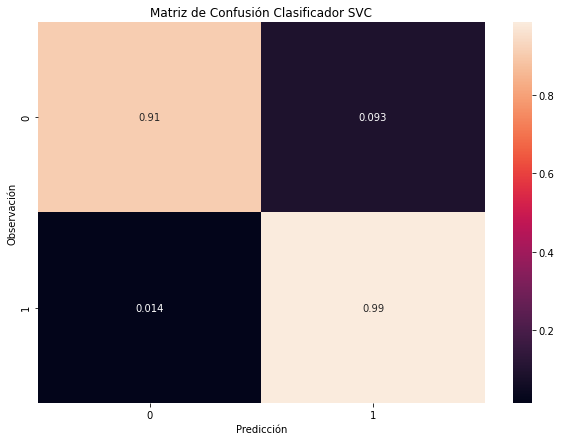

In [ ]:
from sklearn.metrics import confusion_matrix, accuracy_score
import seaborn as sn
import matplotlib.pyplot as plt
from sklearn.svm import SVC 

# crear instancia del clasificador y entrenar
svc = SVC(kernel='linear',probability=True).fit(X_train, y_train)

y_pred_svm = svc.predict(X_test)
cm_svc = confusion_matrix(y_test, y_pred_svm,normalize='true')
accuracy_svc = accuracy_score(y_test, y_pred_svm, normalize=True)

print(f'Accuracy SVC: {accuracy_svc}')
print(f'Coeficientes SVC: {svc.coef_}')
print(f'intersección SVC: {svc.intercept_}')

plt.figure(figsize = (10,7))
sn.heatmap(cm_svc, annot=True)
plt.xlabel("Predicción")
plt.ylabel("Observación")
plt.title('Matriz de Confusión Clasificador SVC')

Accuracy Logit: 0.9649122807017544
Coeficientes Logit: [[ 1.07074399  0.49915156  0.22272663 -0.01526953 -0.03952281 -0.19144445
  -0.26468025 -0.11285403 -0.05900979 -0.01188848  0.03668419  0.44283367
   0.02573571 -0.10476097 -0.00369025 -0.03973424 -0.05460705 -0.01456506
  -0.01392457 -0.00347733  1.12682257 -0.55663096 -0.22391973 -0.01491067
  -0.07069086 -0.58096756 -0.71801938 -0.20941104 -0.19095928 -0.05365233]]
intersección Logit: [0.20161577]
1


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


Text(0.5, 1.0, 'Matriz de Confusión Clasificador Regresión Logit')

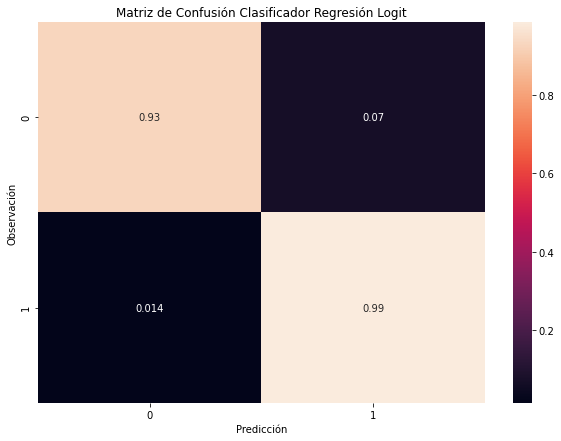

In [ ]:
from sklearn.linear_model import LogisticRegression

# Creamos una instancia de la Regresión Logística
logit = LogisticRegression()

# Entrenar la regresión logística con los datos de entrenamiento
logit.fit(X_train,y_train)

y_pred_logit = logit.predict(X_test)
cm_logit = confusion_matrix(y_test, y_pred_logit,normalize='true')
accuracy_logit = accuracy_score(y_test, y_pred_logit, normalize=True)
coef = logit.coef_

print(f'Accuracy Logit: {accuracy_logit}')
print(f'Coeficientes Logit: {logit.coef_}')
print(f'intersección Logit: {logit.intercept_}')
print(len(coef))

plt.figure(figsize = (10,7))
sn.heatmap(cm_logit, annot=True)
plt.xlabel("Predicción")
plt.ylabel("Observación")
plt.title('Matriz de Confusión Clasificador Regresión Logit')

Accuracy LDA: 0.956140350877193
Coeficientes LDA: [[ 3.80341976e+00 -5.39212301e-02 -4.39436335e-01 -6.34042278e-03
   7.93926949e+00  9.65027592e+01 -1.94072071e+01 -9.48433359e+01
   6.52894977e+00 -1.12179949e+02 -8.34003815e+00  2.43731481e-01
   1.59124190e-01  2.40224154e-02 -3.48805766e+02  4.26007772e+01
   8.24576776e+01 -3.50357849e+02  2.30465093e+01  5.81140729e+01
  -4.13737425e+00 -1.85553514e-01  1.68084303e-01  1.85463710e-02
  -2.55422830e+00 -1.47149164e+01 -1.18801082e+01  2.55875979e+01
  -1.97016750e+01 -2.45735089e+01]]
intersección LDA: [49.29932077]


Text(0.5, 1.0, 'Matriz de Confusión Clasificador LDA')

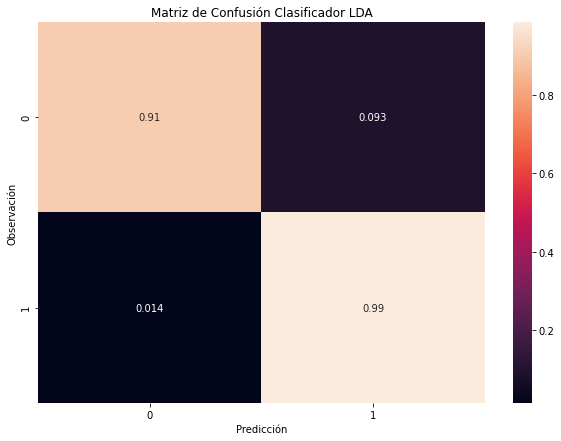

In [ ]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

# Creamos una instancia de la Regresión Logística
lda = LinearDiscriminantAnalysis()

# Entrenar la regresión logística con los datos de entrenamiento
lda.fit(X_train,y_train)

y_pred_lda = lda.predict(X_test)
cm_lda = confusion_matrix(y_test, y_pred_lda,normalize='true')
accuracy_lda = accuracy_score(y_test, y_pred_lda, normalize=True)

print(f'Accuracy LDA: {accuracy_lda}')
print(f'Coeficientes LDA: {lda.coef_}')
print(f'intersección LDA: {lda.intercept_}')

plt.figure(figsize = (10,7))
sn.heatmap(cm_lda, annot=True)
plt.xlabel("Predicción")
plt.ylabel("Observación")
plt.title('Matriz de Confusión Clasificador LDA')


#### 3. Investigue acerca de qué representa a cada columna, elimine las columnas redundantes según cualquiera de los siguientes métodos: Elegir una columna que represente a una de las características o elegir la columna con mayor correlación con las demás y dejar esa asociada a cada característica del tumor. Escale los datos según el método para escalar que a usted le parezca mejor, argumente el por qué de su elección. Aplique los algoritmos de estudio y reporte los resultados obtenidos, discuta sobre la precisión además de el cambio en los coeficientes obtenidos en la parte anterior. ¿A qué se deben los cambios?

In [ ]:
'''
import seaborn as sns
sns.heatmap(df.corr(method='pearson'), annot = True, fmt = '.2f')
'''

"\nimport seaborn as sns\nsns.heatmap(df.corr(method='pearson'), annot = True, fmt = '.2f')\n"

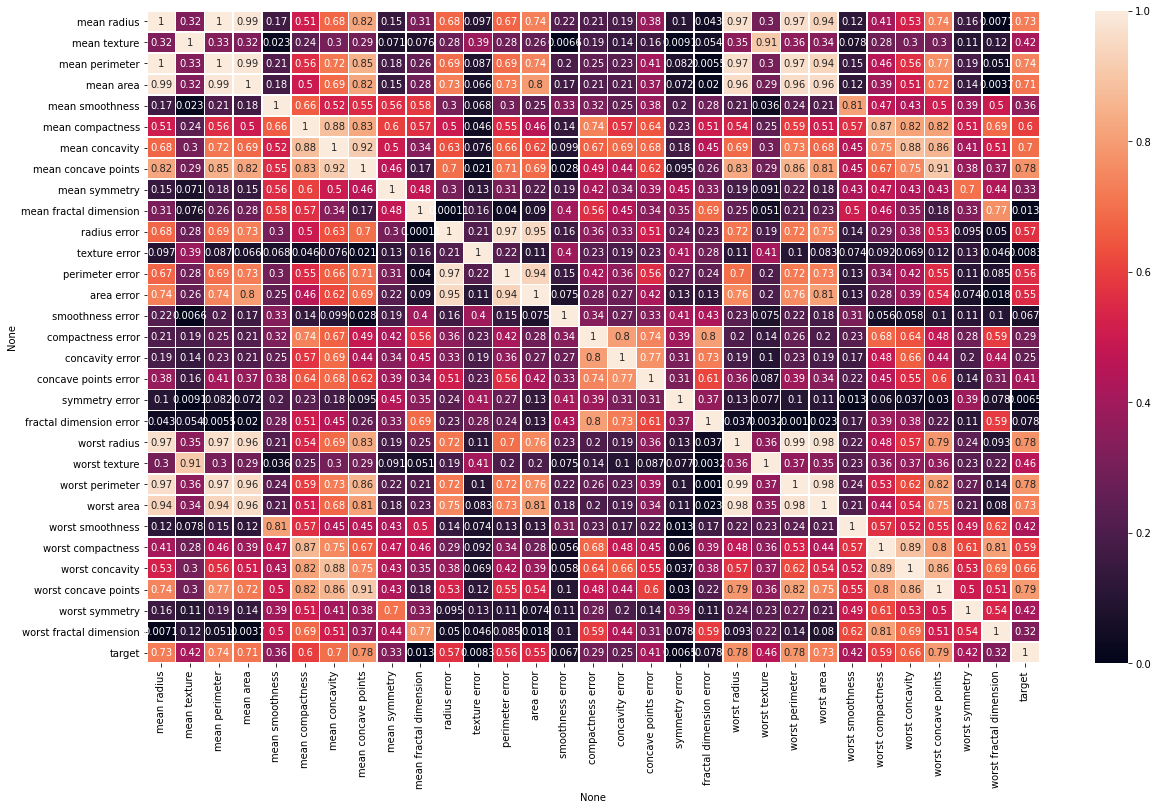

In [ ]:
plt.figure(figsize = (20,12))
ax = sn.heatmap(abs(df.corr(method='pearson')), annot=True, vmin=0, vmax=1, linewidths=.5)

In [ ]:
X_train = X_train.drop(['mean perimeter'], axis=1)
X_train = X_train.drop(['mean area'], axis=1)
X_train = X_train.drop(['perimeter error'], axis=1)
X_train = X_train.drop(['area error'], axis=1)
X_train = X_train.drop(['worst perimeter'], axis=1)
X_train = X_train.drop(['worst area'], axis=1)

X_test = X_test.drop(['mean perimeter'], axis=1)
X_test = X_test.drop(['mean area'], axis=1)
X_test = X_test.drop(['perimeter error'], axis=1)
X_test = X_test.drop(['area error'], axis=1)
X_test = X_test.drop(['worst perimeter'], axis=1)
X_test = X_test.drop(['worst area'], axis=1)

/usr/local/lib/python3.7/dist-packages/pandas/core/generic.py:3889: PerformanceWarning: dropping on a non-lexsorted multi-index without a level parameter may impact performance.
  obj = obj._drop_axis(labels, axis, level=level, errors=errors)


In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler

scaler = StandardScaler()
#acaler = MinMaxScaler()
scaler.fit(X_train, y_train)

X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

Accuracy SVC: 0.956140350877193
Coeficientes SVC: [[-0.88225105 -0.17161402  0.23291207  0.54386535 -0.68277661 -1.5541858
   0.16999976 -0.0859819  -1.43803193  0.24994843 -0.27487263  0.34743707
   0.23755914 -0.17944075  0.46054276  0.45743168 -1.045472   -0.97588849
  -0.24481384  0.26395577 -0.6901853  -0.01276244 -0.8322973  -0.55463838]]
intersección SVC: [0.16721078]


Text(0.5, 1.0, 'Matriz de Confusión Clasificador SVC')

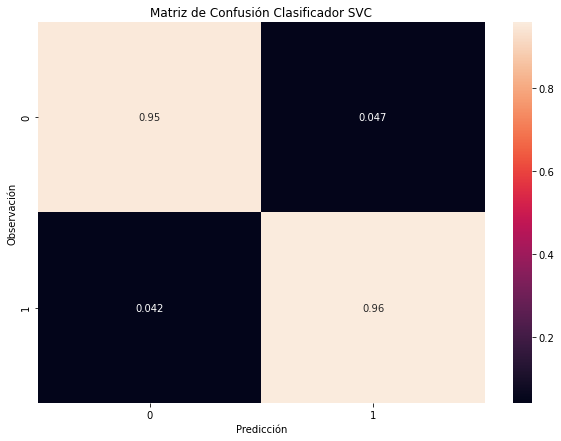

In [ ]:
# crear instancia del clasificador y entrenar
svc2 = SVC(kernel='linear',probability=True).fit(X_train, y_train)

y_pred_svm2 = svc2.predict(X_test)
cm_svc2 = confusion_matrix(y_test, y_pred_svm2,normalize='true')
accuracy_svc2 = accuracy_score(y_test, y_pred_svm2, normalize=True)

print(f'Accuracy SVC: {accuracy_svc2}')
print(f'Coeficientes SVC: {svc2.coef_}')
print(f'intersección SVC: {svc2.intercept_}')

plt.figure(figsize = (10,7))
sn.heatmap(cm_svc2, annot=True)
plt.xlabel("Predicción")
plt.ylabel("Observación")
plt.title('Matriz de Confusión Clasificador SVC')

Accuracy Logit: 0.9736842105263158
Coeficientes Logit: [[-1.12369942 -0.41846987 -0.01301696  0.45840578 -0.90580665 -1.32210197
   0.25103279  0.28659173 -2.01576258  0.17072756 -0.32147082  0.55192446
   0.28414341 -0.33081215  0.58298998  0.56722311 -1.57036692 -1.23346883
  -0.43136999 -0.04269744 -0.94454634 -0.78220126 -1.21098984 -0.12298479]]
intersección Logit: [0.75324128]


Text(0.5, 1.0, 'Matriz de Confusión Clasificador Regresión Logit')

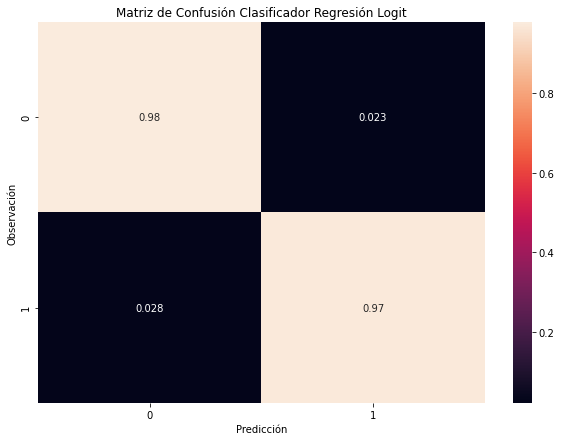

In [ ]:
# Creamos una instancia de la Regresión Logística
logit2 = LogisticRegression()

# Entrenar la regresión logística con los datos de entrenamiento
logit2.fit(X_train,y_train)

y_pred_logit2 = logit2.predict(X_test)
cm_logit2 = confusion_matrix(y_test, y_pred_logit2,normalize='true')
accuracy_logit2 = accuracy_score(y_test, y_pred_logit2, normalize=True)

print(f'Accuracy Logit: {accuracy_logit2}')
print(f'Coeficientes Logit: {logit2.coef_}')
print(f'intersección Logit: {logit2.intercept_}')

plt.figure(figsize = (10,7))
sn.heatmap(cm_logit2, annot=True)
plt.xlabel("Predicción")
plt.ylabel("Observación")
plt.title('Matriz de Confusión Clasificador Regresión Logit')

Accuracy LDA: 0.9385964912280702
Coeficientes LDA: [[-0.2461819  -0.48744734 -0.06309728  2.27010071  0.27500132 -3.85656866
   0.42004843  0.53772216 -0.57939754 -0.04603387 -0.7584009   1.27986175
   2.0994535  -2.18611619  0.23456407 -0.35504414 -1.95861294 -0.79872645
  -0.04782138 -1.08605348 -2.75330673  1.43591248 -1.66746411 -0.86467681]]
intersección LDA: [2.19398408]


Text(0.5, 1.0, 'Matriz de Confusión Clasificador LDA')

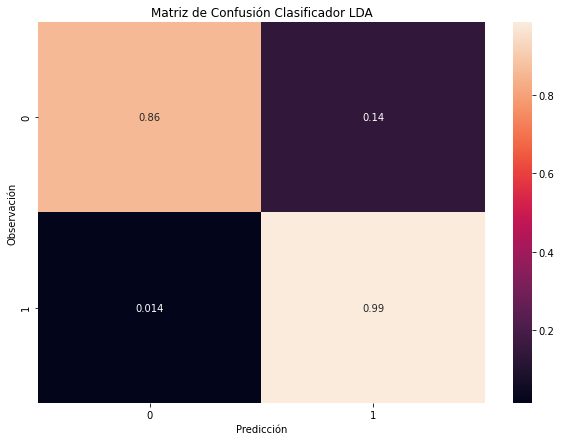

In [ ]:
# Creamos una instancia de la Regresión Logística
lda2 = LinearDiscriminantAnalysis()

# Entrenar la regresión logística con los datos de entrenamiento
lda2.fit(X_train,y_train)

y_pred_lda2 = lda2.predict(X_test)
cm_lda2 = confusion_matrix(y_test, y_pred_lda2,normalize='true')
accuracy_lda2 = accuracy_score(y_test, y_pred_lda2, normalize=True)

print(f'Accuracy LDA: {accuracy_lda2}')
print(f'Coeficientes LDA: {lda2.coef_}')
print(f'intersección LDA: {lda2.intercept_}')

plt.figure(figsize = (10,7))
sn.heatmap(cm_lda2, annot=True)
plt.xlabel("Predicción")
plt.ylabel("Observación")
plt.title('Matriz de Confusión Clasificador LDA')